##K-Means clustering on COVID-19 data from India

Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

Load File and filter data for a specific date

In [ ]:
df = pd.read_csv("complete.csv")
df2=df
df=df[df["Date"]=='2020-08-06']
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35 entries, 4657 to 4691
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       35 non-null     object 
 1   Name of State / UT         35 non-null     object 
 2   Latitude                   35 non-null     float64
 3   Longitude                  35 non-null     float64
 4   Total Confirmed cases      35 non-null     float64
 5   Death                      35 non-null     object 
 6   Cured/Discharged/Migrated  35 non-null     float64
 7   New cases                  35 non-null     int64  
 8   New deaths                 35 non-null     int64  
 9   New recovered              35 non-null     int64  
dtypes: float64(4), int64(3), object(3)
memory usage: 3.0+ KB


Select important columns

In [ ]:
df=df[["Name of State / UT","Total Confirmed cases","Cured/Discharged/Migrated"]]
df.index=[i for i in range(35)]
df['Total Confirmed cases'] = df['Total Confirmed cases'].astype(int)
df['Cured/Discharged/Migrated'] = df['Cured/Discharged/Migrated'].astype(int)

df2=df2[["Name of State / UT","Total Confirmed cases","Cured/Discharged/Migrated"]]
df2.index=[i for i in range(4692)]
df2['Total Confirmed cases'] = df2['Total Confirmed cases'].astype(int)
df2['Cured/Discharged/Migrated'] = df2['Cured/Discharged/Migrated'].astype(int)

<ipython-input-52-5e4917b9ff8d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total Confirmed cases'] = df['Total Confirmed cases'].astype(int)
<ipython-input-52-5e4917b9ff8d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cured/Discharged/Migrated'] = df['Cured/Discharged/Migrated'].astype(int)
<ipython-input-52-5e4917b9ff8d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

Prepare data for clustering

In [ ]:
X = df.iloc[:, [1, 2]].values

Elbow Method to find optimal K

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

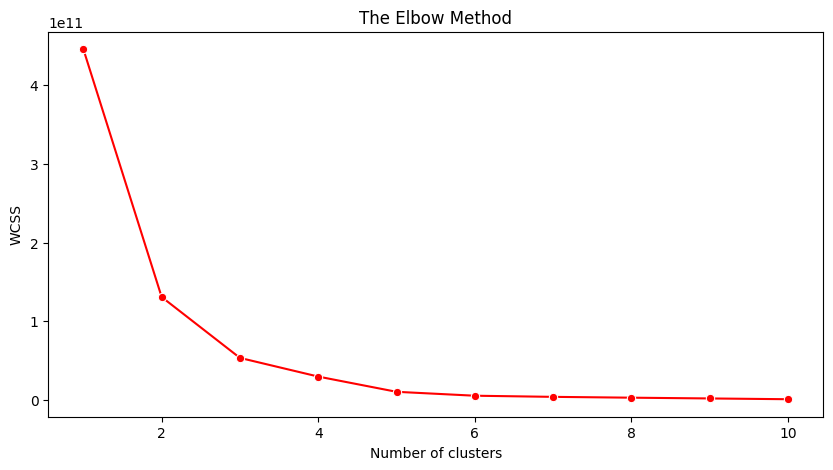

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(10,5))
sns.lineplot(x=range(1, 11),y=wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Perform K-Means clustering (3 clusters) and Visualize the clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


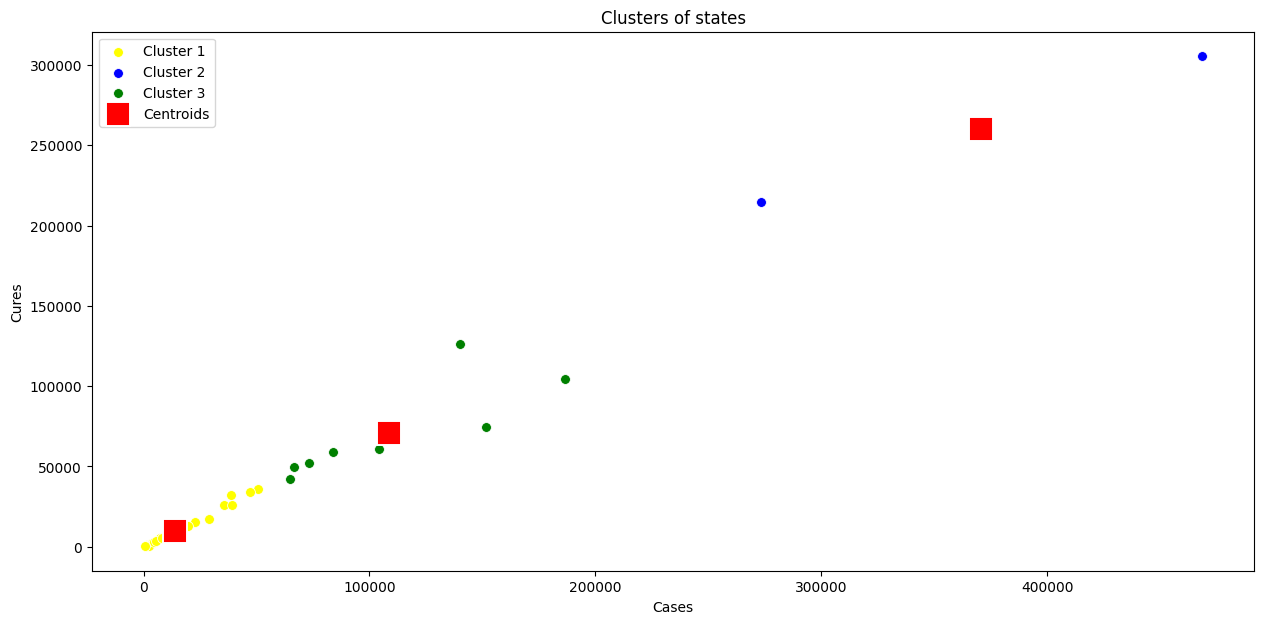

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
plt.figure(figsize=(15,7))
sns.scatterplot(x=X[y_kmeans == 0, 0],y=X[y_kmeans == 0, 1], color = 'yellow', label = 'Cluster 1',s=50)
sns.scatterplot(x=X[y_kmeans == 1, 0],y=X[y_kmeans == 1, 1], color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(x=X[y_kmeans == 2, 0],y=X[y_kmeans == 2, 1], color = 'green', label = 'Cluster 3',s=50)
sns.scatterplot(x=kmeans.cluster_centers_[:, 0],y=kmeans.cluster_centers_[:, 1], color = 'red',
                label = 'Centroids',s=300,marker=',')
plt.grid(False)
plt.title('Clusters of states')
plt.xlabel('Cases')
plt.ylabel('Cures')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


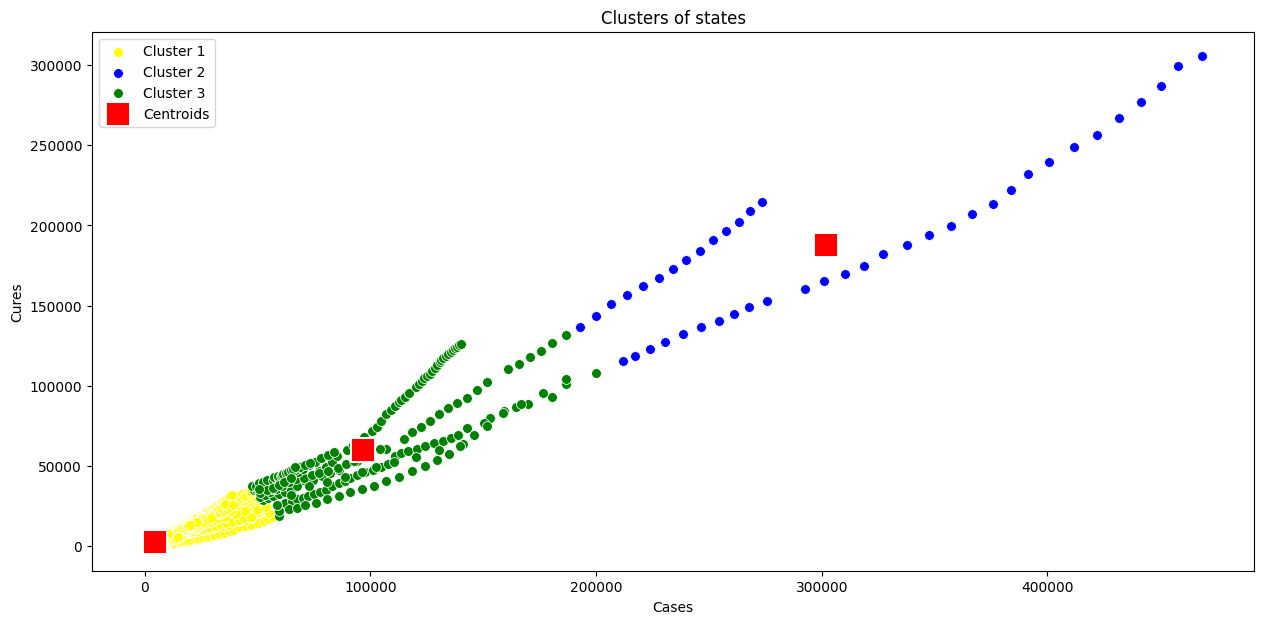

In [ ]:
X2 = df2.iloc[:, [1, 2]].values
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X2)
plt.figure(figsize=(15,7))
sns.scatterplot(x=X2[y_kmeans == 0, 0],y=X2[y_kmeans == 0, 1], color = 'yellow', label = 'Cluster 1',s=50)
sns.scatterplot(x=X2[y_kmeans == 1, 0],y=X2[y_kmeans == 1, 1], color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(x=X2[y_kmeans == 2, 0],y=X2[y_kmeans == 2, 1], color = 'green', label = 'Cluster 3',s=50)
sns.scatterplot(x=kmeans.cluster_centers_[:, 0],y=kmeans.cluster_centers_[:, 1], color = 'red',
                label = 'Centroids',s=300,marker=',')
plt.grid(False)
plt.title('Clusters of states')
plt.xlabel('Cases')
plt.ylabel('Cures')
plt.legend()
plt.show()